Script gets background corrected data using the naive method or countcorrect with a small number of iterations suitable for cpu work.

In [14]:
import sys,os
import pickle
import anndata
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
data_type = 'float32'
os.environ["THEANO_FLAGS"] = 'device=cuda,floatX=' + data_type + ',force_device=True' + ',dnn.enabled=False'
import countcorrect as cc

In [10]:
adata_wta = sc.read_h5ad(open("/lustre/scratch117/cellgen/team283/Kidney-Nanostring/Kidney_AnnData_2.h5ad", "rb"))

In [3]:
counts_geneProbes = np.asarray(adata_wta.X)
counts_negativeProbes = np.asarray(adata_wta.obsm['negProbes'])
counts_nuclei = np.asarray(adata_wta.obs['AOINucleiCount']).reshape(len(adata_wta.obs['AOINucleiCount']),1).squeeze()

In [12]:
X_corrected = cc.run_countcorrect(counts_geneProbes, counts_negativeProbes, counts_nuclei, naive = True)

In [13]:
adata_wta.layers['X_naive'] = X_corrected

Initializing model...
Fitting model ...


Average Loss = inf: 100%|██████████| 1000/1000 [42:28<00:00,  2.55s/it]
Finished [100%]: Average Loss = nan


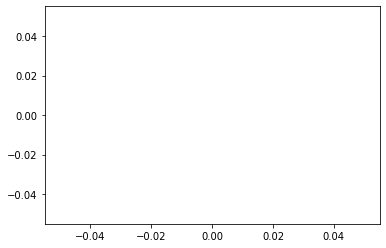

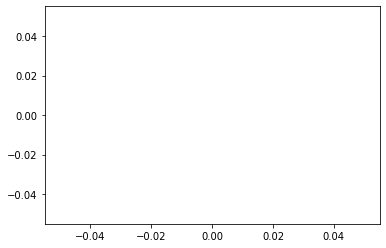

Sampling from posterior distribution...
Done.


In [8]:
X_corrected = cc.run_countcorrect(counts_geneProbes, counts_negativeProbes, counts_nuclei, total_iterations = 1000)

In [11]:
adata_wta.layers['X_corrected_cpu'] = X_corrected

In [17]:
adata_wta.write_h5ad('/lustre/scratch117/cellgen/team283/Kidney-Nanostring/Kidney_AnnData_3.h5ad')